<a href="https://colab.research.google.com/github/GabeMaldonado/sklearn_FUN/blob/main/Predictive_Modeling_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a model with sklearn

Build a predictive model on a tabular dataset using only numerical features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

df = pd.read_csv("/content/adult_census.csv")
df.sample(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
12355,30,Private,62932,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0.0,60.0,United-States,<=50K
14940,47,Self-emp-inc,147869,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0.0,50.0,United-States,<=50K
3684,18,Private,232190,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0.0,20.0,United-States,<=50K
4313,43,Self-emp-inc,677398,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0.0,45.0,United-States,>50K
13806,58,State-gov,138130,HS-grad,9,Never-married,Tech-support,Own-child,Black,Female,0,0.0,40.0,United-States,<=50K


Isolate the target variable

In [4]:
target_name = "class"
target = df[target_name]
target.dropna(inplace=True)

Separate the data and put them on a different dataframe

In [5]:
data = df.drop(columns=[target_name])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17185 entries, 0 to 17184
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             17185 non-null  int64  
 1   workclass       17185 non-null  object 
 2   fnlwgt          17185 non-null  int64  
 3   education       17185 non-null  object 
 4   education-num   17185 non-null  int64  
 5   marital-status  17185 non-null  object 
 6   occupation      17185 non-null  object 
 7   relationship    17185 non-null  object 
 8   race            17185 non-null  object 
 9   sex             17185 non-null  object 
 10  capital-gain    17185 non-null  int64  
 11  capital-loss    17184 non-null  float64
 12  hours-per-week  17184 non-null  float64
 13  native-country  17184 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.8+ MB


Now, get only the numeric features that are relevant for the analysis. (age,, capital-gain, capital-loos, hours-per-week)

In [6]:
data.drop(columns=['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex', 'native-country'], inplace=True)

In [7]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0.0,40.0
1,38,0,0.0,50.0
2,28,0,0.0,40.0
3,44,7688,0.0,40.0
4,18,0,0.0,30.0


In [8]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [9]:
# print the number of features and samples

print(f"The dataset contains {data.shape[1]} of features and {data.shape[0]} samples")

The dataset contains 4 of features and 17185 samples


In [10]:
data.dropna(inplace=True)
data.reset_index(drop=True)


,age,capital-gain,capital-loss,hours-per-week
0,25,0,0.0,40.0
1,38,0,0.0,50.0
2,28,0,0.0,40.0
3,44,7688,0.0,40.0
4,18,0,0.0,30.0
...,...,...,...,...
17179,30,0,0.0,45.0
17180,28,0,0.0,40.0
17181,63,0,0.0,55.0
17182,51,0,0.0,20.0


## Fit a model and make predictions

We build a classification model using the *k-nearest neighbors* algorithm. To predict the target of a new sample, a k-nearest neighbors takes into account its *k* closest samples in the training set and predicts the majority targert of these samples. 

<div class="admonition caution alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Caution!</p>
<p class="last">We use a K-nearest neighbors here. However, be aware that it is seldom useful
in practice. We use it because it is an intuitive algorithm. In the next
notebook, we will introduce better models.</p>
</div>

The `fit` method is called to train the model from the input (features) and target data.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

The method `fit` is composed of two elements: (i) a **learning algorithm**
and (ii) some **model states**. The learning algorithm takes the training
data and training target as input and sets the model states. These model
states will be used later to either predict (for classifiers and regressors)
or transform data (for transformers).

Both the learning algorithm and the type of model states are specific to each
type of model.

In [12]:
# Use the model to make some predictions using the same dataset

target_predicted = model.predict(data)

To predict, a model uses a **prediction function** that will use the input
data together with the model states. As for the learning algorithm and the
model states, the prediction function is specific for each type of model.

Take a look at the first five predictions:

In [13]:
target_predicted[:5]

array([' <=50K', ' >50K', ' <=50K', ' >50K', ' <=50K'], dtype=object)

Compare these predictions to the actual data

In [14]:
target[:5]

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

Let's compare the predictions with the actual data/


In [15]:
target[:5] == target_predicted[:5]

0     True
1    False
2    False
3     True
4     True
Name: class, dtype: bool

In [16]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 3 / 5


Calculate average success rate

In [17]:
(target == target_predicted).mean()

0.8254189944134078

## Train-test split the dataset

Scikit-learn provides the helper function
`sklearn.model_selection.train_test_split` which is used to automatically
split the dataset into two subsets.

In [18]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25)

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">In scikit-learn setting the <tt class="docutils literal">random_state</tt> parameter allows to get
deterministic results when we use a random number generator. In the
<tt class="docutils literal">train_test_split</tt> case the randomness comes from shuffling the data, which
decides how the dataset is split into a train and a test set).</p>
</div>

When calling the function `train_test_split`, we specified that we would like
to have 25% of samples in the testing set while the remaining samples (75%)
will be available in the training set. We can check quickly if we got
what we expected.

In [19]:
print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 4296 => 25.0% of the original set


In [20]:
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data.shape[0] * 100:.1f}% of the"
      f" original set")

Number of samples in training: 12888 => 75.0% of the original set


In the previous notebook, we used a k-nearest neighbors model. While this
model is intuitive to understand, it is not widely used in practice. Now, we
will use a more useful model, called a logistic regression, which belongs to
the linear models family.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>In short, linear models find a set of weights to combine features linearly
and predict the target. For instance, the model can come up with a rule such
as:</p>
<ul class="simple">
<li>if <tt class="docutils literal">0.1 * age + 3.3 * <span class="pre">hours-per-week</span> - 15.1 &gt; 0</tt>, predict <tt class="docutils literal"><span class="pre">high-income</span></tt></li>
<li>otherwise predict <tt class="docutils literal"><span class="pre">low-income</span></tt></li>
</ul>
<p class="last">Linear models, and in particular the logistic regression, will be covered in
more details in the "Linear models" module later in this course. For now the
focus is to use this logistic regression model in scikit-learn rather than
understand how it works in details.</p>
</div>

To create a logistic regression model in scikit-learn you can do:

In [21]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

Now that the model has been created, you can use it exactly the same way as
we used the k-nearest neighbors model in the previous notebook. In
particular, we can use the `fit` method to train the model using the training
data and labels:

In [23]:
model.fit(data_train, target_train)

LogisticRegression()

We can also use the `score` method to check the model generalization performance
on the test set.

In [24]:
accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.797


In scikit-learn, the `score` method of a classification model returns the accuracy,
i.e. the fraction of correctly classified samples. In this case, around
8 / 10 of the times, the logistic regression predicts the right income of a
person. Now the real question is: is this generalization performance relevant
of a good predictive model? Find out by solving the next exercise!

In this notebook, we learned to:

* identify numerical data in a heterogeneous dataset;
* select the subset of columns corresponding to numerical data;
* use the scikit-learn `train_test_split` function to separate data into
  a train and a test set;
* train and evaluate a logistic regression model.

## Compare performance of the previous classifier with some simple baseline classifiers.

Use a `DummyClassifier` such that the resulting classifier will always
predict the class `' >50K'`. What is the accuracy score on the test set?
Repeat the experiment by always predicting the class `' <=50K'`.


In [25]:
from sklearn.dummy import DummyClassifier

# predict for 50k
class_to_predict =  ' >50K'
high_rev_clf = DummyClassifier(strategy='constant',
                               constant=class_to_predict)
high_rev_clf.fit(data_train, target_train)
score = high_rev_clf.score(data_test, target_test)

print(f"Accuracy of a model predicting only high revenue: {score:.3f}")

Accuracy of a model predicting only high revenue: 0.240


In [26]:
# predict for <50K
class_to_predict = ' <=50K'
low_rev_clf = DummyClassifier(strategy='constant',
                              constant=class_to_predict)
low_rev_clf.fit(data_train, target_train)
score = low_rev_clf.score(data_test, target_test)

print(f"Accuracy of a model predicting only high revenue: {score:.3f}")

Accuracy of a model predicting only high revenue: 0.760


## Preprocessing for Numerical Features

Here we will see: 
* an example of preprocessing, namely **scaling numerical variables**
* using scikit-learn **pipeline** to chain preprocessing and model training

## Model fitting with preprocessing

A range of preprocessing algorithms in scikit-learn allow us to transform
the input data before training a model. In our case, we will standardize the
data and then train a new logistic regression model on that new version of
the dataset.

Let's start by printing some statistics about the training data.

In [27]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,12888.000000,12888.000000,12888.000000,12888.000000
mean,38.835273,1063.742629,86.520562,40.396338
std,13.864780,7517.837288,399.551495,12.430589
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,3770.000000,99.000000


We see that the dataset's features span across different ranges. Some
algorithms make some assumptions regarding the feature distributions and
usually normalizing features will be helpful to address these assumptions.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p>Here are some reasons for scaling features:</p>
<ul class="last simple">
<li>Models that rely on the distance between a pair of samples, for instance
k-nearest neighbors, should be trained on normalized features to make each
feature contribute approximately equally to the distance computations.</li>
<li>Many models such as logistic regression use a numerical solver (based on
gradient descent) to find their optimal parameters. This solver converges
faster when the features are scaled.</li>
</ul>
</div>

Whether or not a machine learning model requires scaling the features depends
on the model family. Linear models such as logistic regression generally
benefit from scaling the features while other models such as decision trees
do not need such preprocessing (but will not suffer from it).

We show how to apply such normalization using a scikit-learn transformer
called `StandardScaler`. This transformer shifts and scales each feature
individually so that they all have a 0-mean and a unit standard deviation.

We will investigate different steps used in scikit-learn to achieve such a
transformation of the data.

First, one needs to call the method `fit` in order to learn the scaling from
the data.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

The `fit` method for transformers is similar to the `fit` method for predictors. The main difference is that the former has a single argument (the data matrix), whereas the latter has two arguments (the data matrix and the target).

In thsi case, the algorithm needs to compute the mean and standard deviation for each feature and store them into some NumPy arrays. Here, these
statistics are the model states.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">The fact that the model states of this scaler are arrays of means and
standard deviations is specific to the <tt class="docutils literal">StandardScaler</tt>. Other
scikit-learn transformers will compute different statistics and store them
as model states, in the same fashion.</p>
</div>

We can inspect the computed means and standard deviations.

In [29]:
scaler.mean_

array([  38.83527312, 1063.7426288 ,   86.52056176,   40.39633768])

In [30]:
scaler.scale_

array([  13.86424181, 7517.54562166,  399.53599373,   12.43010723])

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">scikit-learn convention: if an attribute is learned from the data, its name
ends with an underscore (i.e. <tt class="docutils literal">_</tt>), as in <tt class="docutils literal">mean_</tt> and <tt class="docutils literal">scale_</tt> for the
<tt class="docutils literal">StandardScaler</tt>.</p>
</div>

Scaling the data is applied to each feature individually (i.e. each column in
the data matrix). For each feature, we subtract its mean and divide by its
standard deviation.

Once we have called the `fit` method, we can perform data transformation by
calling the method `transform`.

In [31]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.01188142, -0.14150132, -0.21655261, -0.0318853 ],
       [-0.06024658, -0.14150132, -0.21655261, -0.0318853 ],
       [-0.78152655, -0.14150132, -0.21655261,  0.20946419],
       ...,
       [ 1.02167339, -0.14150132, -0.21655261, -0.83638359],
       [ 0.5167774 , -0.14150132, -0.21655261, -0.0318853 ],
       [ 1.45444137, -0.14150132, -0.21655261, -2.68672965]])

The `transform` method for transformers is similar to the `predict` method
for predictors. It uses a predefined function, called a **transformation
function**, and uses the model states and the input data. However, instead of
outputting predictions, the job of the `transform` method is to output a
transformed version of the input data.

Finally, the method `fit_transform` is a shorthand method to call
successively `fit` and then `transform`.


In [32]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.01188142, -0.14150132, -0.21655261, -0.0318853 ],
       [-0.06024658, -0.14150132, -0.21655261, -0.0318853 ],
       [-0.78152655, -0.14150132, -0.21655261,  0.20946419],
       ...,
       [ 1.02167339, -0.14150132, -0.21655261, -0.83638359],
       [ 0.5167774 , -0.14150132, -0.21655261, -0.0318853 ],
       [ 1.45444137, -0.14150132, -0.21655261, -2.68672965]])

In [33]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,1.288800e+04,1.288800e+04,1.288800e+04,1.288800e+04
mean,1.550591e-16,-3.242759e-16,8.214729e-16,3.027787e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.574935e+00,-1.415013e-01,-2.165526e-01,-3.169429e+00
25%,-7.815266e-01,-1.415013e-01,-2.165526e-01,-3.188530e-02
50%,-1.323746e-01,-1.415013e-01,-2.165526e-01,-3.188530e-02
75%,6.610334e-01,-1.415013e-01,-2.165526e-01,3.703638e-01
max,3.690409e+00,1.316058e+01,9.219393e+00,4.714655e+00


Notice that the mean of all the columns is close to 0 and the standard deviation
in all cases is close to 1.
We can also visualize the effect of `StandardScaler` using a jointplot to show
both the histograms of the distributions and a scatterplot of any pair of numerical
features at the same time. We can observe that `StandardScaler` does not change
the structure of the data itself but the axes get shifted and scaled.

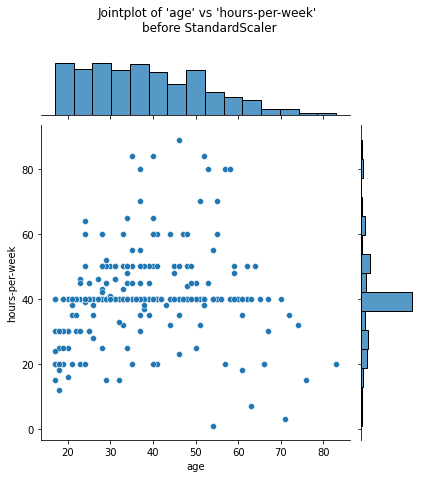

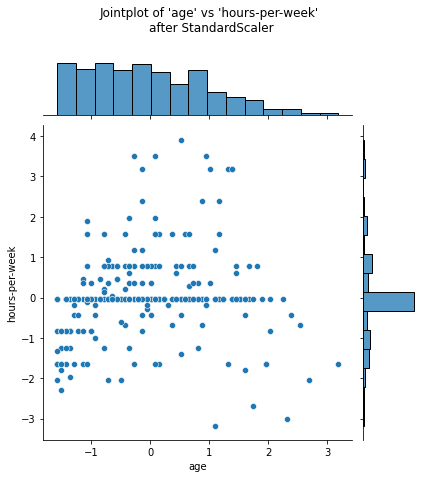

In [34]:
# visualize the regular vs the scaled data

num_points_to_plot = 300

# original data
sns.jointplot(data=data_train[:num_points_to_plot],
              x="age", y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

# scaled data

sns.jointplot(data=data_train_scaled[:num_points_to_plot],
              x="age", y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)



We can easily combine sequential operations with a scikit-learn
`Pipeline`, which chains together operations and is used as any other
classifier or regressor. The helper function `make_pipeline` will create a
`Pipeline`: it takes as arguments the successive transformations to perform,
followed by the classifier or regressor model.

In [35]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

The `make_pipeline` function did not require us to give a name to each step.
Indeed, it was automatically assigned based on the name of the classes
provided; a `StandardScaler` will be a step named `"standardscaler"` in the
resulting pipeline. We can check the name of each steps of our model:

In [36]:
model.named_steps

{'logisticregression': LogisticRegression(),
 'standardscaler': StandardScaler()}

This predictive pipeline exposes the same methods as the final predictor:
`fit` and `predict` (and additionally `predict_proba`, `decision_function`,
or `score`).



In [37]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

When calling `model.fit`, the method `fit_transform` from each underlying
transformer (here a single transformer) in the pipeline will be called to:

- learn their internal model states
- transform the training data. Finally, the preprocessed data are provided to
  train the predictor.

To predict the targets given a test set, one uses the `predict` method.

In [38]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

The method `transform` of each transformer (here a single transformer) is
called to preprocess the data. Note that there is no need to call the `fit`
method for these transformers because we are using the internal model states
computed when calling `model.fit`. The preprocessed data is then provided to
the predictor that will output the predicted target by calling its method
`predict`.

As a shorthand, we can check the score of the full predictive pipeline
calling the method `model.score`. Thus, let's check the computational and
generalization performance of such a predictive pipeline.

In [39]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.797 with a fitting time of 0.179 seconds in 12 iterations


We could compare this predictive model with the predictive model used in the previous notebook which did not scale features.

In [40]:
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [41]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.797 with a fitting time of 0.495 seconds in 63 iterations


We see that scaling the data before training the logistic regression was
beneficial in terms of computational performance. Indeed, the number of
iterations decreased as well as the training time. The generalization
performance did not change since both models converged.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">Working with non-scaled data will potentially force the algorithm to iterate
more as we showed in the example above. There is also the catastrophic
scenario where the number of required iterations is larger than the maximum
number of iterations allowed by the predictor (controlled by the <tt class="docutils literal">max_iter</tt>)
parameter. Therefore, before increasing <tt class="docutils literal">max_iter</tt>, make sure that the data
are well scaled.</p>
</div>

## Model Evaluation Using Cross-Validation

Create a model using the `make_pipeline` tool to chain the preprocessing and the estimator in every iteration of the cross-validation.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [43]:
# create model

model = make_pipeline(StandardScaler(), LogisticRegression())

### The need for cross-validation

In the previous steps, we split the original data into a training set and a
testing set. The score of a model will in general depend on the way we make
such a split. One downside of doing a single split is that it does not give
any information about this variability. Another downside, in a setting where
the amount of data is small, is that the data available for training and
testing will be even smaller after splitting.

Instead, we can use cross-validation. Cross-validation consists of repeating
the procedure such that the training and testing sets are different each time.
Generalization performance metrics are collected for each repetition and then
aggregated. As a result we can assess the variability of our measure of the
model's generalization performance.

Note that there exists several cross-validation strategies, each of them
defines how to repeat the `fit`/`score` procedure. In this section, we will
use the K-fold strategy: the entire dataset is split into `K` partitions. The
`fit`/`score` procedure is repeated `K` times where at each iteration `K - 1`
partitions are used to fit the model and `1` partition is used to score. 
For each cross-validation split, the procedure trains a clone of model on all the red
samples and evaluate the score of the model on the blue samples.
As mentioned earlier, there is a variety of different cross-validation
strategies. Some of these aspects will be covered in more detail in future notebooks.</p>
</div>

Cross-validation is therefore computationally intensive because it requires
training several models instead of one.

In scikit-learn, the function `cross_validate` allows to do cross-validation
and you need to pass it the model, the data, and the target. Since there
exists several cross-validation strategies, `cross_validate` takes a parameter
`cv` which defines the splitting strategy.

In [44]:
%%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data, target, cv=5)
cv_result

CPU times: user 583 ms, sys: 403 ms, total: 985 ms
Wall time: 1.07 s


In [45]:
cv_result

{'fit_time': array([0.18823218, 0.13735294, 0.16664505, 0.17054701, 0.16506481]),
 'score_time': array([0.02373314, 0.0296917 , 0.02895999, 0.02746201, 0.02642846]),
 'test_score': array([0.80098923, 0.80215304, 0.79371545, 0.79807972, 0.80529686])}

The output of `cross_validate` is a Python dictionary, which by default
contains three entries:
- (i) the time to train the model on the training data for each fold,
- (ii) the time to predict with the model on the testing data for each fold,
- (iii) the default score on the testing data for each fold.

Setting `cv=5` created 5 distinct splits to get 5 variations for the training
and testing sets. Each training set is used to fit one model which is then
scored on the matching test set. The default strategy when setting `cv=int` is
the K-fold cross-validation where `K` corresponds to the (integer) number of
splits. Setting `cv=5` or `cv=10` is a common practice, as it is a good
trade-off between computation time and stability of the estimated variability.

Note that by default the `cross_validate` function discards the `K` models
that were trained on the different overlapping subset of the dataset. The goal
of cross-validation is not to train a model, but rather to estimate
approximately the generalization performance of a model that would have been
trained to the full training set, along with an estimate of the variability
(uncertainty on the generalization accuracy).

You can pass additional parameters to
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
to collect additional information, such as the training scores of the models
obtained on each round or even return the models themselves instead of
discarding them.  These features will be covered in a future notebook.

Let's extract the scores computed on the test fold of each cross-validation
round from the `cv_result` dictionary and compute the mean accuracy and the
variation of the accuracy across folds.

In [46]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.800 +/- 0.004


Note that by computing the standard-deviation of the cross-validation scores,
we can estimate the uncertainty of our model generalization performance. This
is the main advantage of cross-validation and can be crucial in practice, for
example when comparing different models to figure out whether one is better
than the other or whether our measures of the generalization performance of each
model are within the error bars of one-another.

In this particular case, only the first 2 decimals seem to be trustworthy. If
you go up in this notebook, you can check that the performance we get with
cross-validation is compatible with the one from a single train-test split.

### Encoding of categorical variables

In this section, we will present typical ways of dealing with
**categorical variables** by encoding them, namely **ordinal encoding** and
**one-hot encoding**.

In [47]:
adult_census = pd.read_csv("/content/adult_census.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])


## Identify categorical variables

As we saw in the previous section, a numerical variable is a
quantity represented by a real or integer number. These variables can be
naturally handled by machine learning algorithms that are typically composed
of a sequence of arithmetic instructions such as additions and
multiplications.

In contrast, categorical variables have discrete values, typically
represented by string labels (but not only) taken from a finite list of
possible choices. For instance, the variable `native-country` in our dataset
is a categorical variable because it encodes the data using a finite list of
possible countries (along with the `?` symbol when this information is
missing):

In [48]:
data["native-country"].value_counts().sort_index()

 ?                               857
 Cambodia                         28
 Canada                          182
 China                           122
 Columbia                         85
 Cuba                            138
 Dominican-Republic              103
 Ecuador                          45
 El-Salvador                     155
 England                         127
 France                           38
 Germany                         206
 Greece                           49
 Guatemala                        88
 Haiti                            75
 Holand-Netherlands                1
 Honduras                         20
 Hong                             30
 Hungary                          19
 India                           151
 Iran                             59
 Ireland                          37
 Italy                           105
 Jamaica                         106
 Japan                            92
 Laos                             23
 Mexico                          951
 

How can we easily recognize categorical columns among the dataset? Part of
the answer lies in the columns' data type:

In [49]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

If we look at the `"native-country"` column, we observe its data type is
`object`, meaning it contains string values.

## Select features based on their data type

In the previous notebook, we manually defined the numerical columns. We could
do a similar approach. Instead, we will use the scikit-learn helper function
`make_column_selector`, which allows us to select columns based on
their data type. We will illustrate how to use this helper.

In [50]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

Here, we created the selector by passing the data type to include; we then
passed the input dataset to the selector object, which returned a list of
column names that have the requested data type. We can now filter out the
unwanted columns:

In [51]:
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [52]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 8 features


## Strategies to encode categories

### Encoding ordinal categories

The most intuitive strategy is to encode each category with a different
number. The `OrdinalEncoder` will transform the data in such manner.
We will start by encoding a single column to understand how the encoding
works.

In [53]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["education"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[ 1.],
       [11.],
       [ 7.],
       ...,
       [11.],
       [11.],
       [11.]])

We see that each category in `"education"` has been replaced by a numeric
value. We could check the mapping between the categories and the numerical
values by checking the fitted attribute `categories_`.

In [54]:
encoder.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

Now we can check the encoding applied on all categorical features

In [55]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 4.,  1.,  4.,  7.,  3.,  2.,  1., 39.],
       [ 4., 11.,  2.,  5.,  0.,  4.,  1., 39.],
       [ 2.,  7.,  2., 11.,  0.,  4.,  1., 39.],
       [ 4., 15.,  2.,  7.,  0.,  2.,  1., 39.],
       [ 0., 15.,  4.,  0.,  3.,  4.,  0., 39.]])

In [56]:
print(
    f"The dataset encoded contains {data_encoded.shape[1]} features"
)

The dataset encoded contains 8 features


We see that the categories have been encoded for each feature (column)
independently. We also note that the number of features before and after the
encoding is the same.

However, be careful when applying this encoding strategy:
using this integer representation leads downstream predictive models
to assume that the values are ordered (0 < 1 < 2 < 3... for instance).

By default, `OrdinalEncoder` uses a lexicographical strategy to map string
category labels to integers. This strategy is arbitrary and often
meaningless. For instance, suppose the dataset has a categorical variable
named `"size"` with categories such as "S", "M", "L", "XL". We would like the
integer representation to respect the meaning of the sizes by mapping them to
increasing integers such as `0, 1, 2, 3`.
However, the lexicographical strategy used by default would map the labels
"S", "M", "L", "XL" to 2, 1, 0, 3, by following the alphabetical order.

The `OrdinalEncoder` class accepts a `categories` constructor argument to
pass categories in the expected ordering explicitly. You can find more
information in the
[scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
if needed.

If a categorical variable does not carry any meaningful order information
then this encoding might be misleading to downstream statistical models and
you might consider using one-hot encoding instead (see below).

### Encoding nominal categories (without assuming any order)

`OneHotEncoder` is an alternative encoder that prevents the downstream
models to make a false assumption about the ordering of categories. For a
given feature, it will create as many new columns as there are possible
categories. For a given sample, the value of the column corresponding to the
category will be set to `1` while all the columns of the other categories
will be set to `0`.

We will start by encoding a single feature (e.g. `"education"`) to illustrate
how the encoding works.

In [57]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p><tt class="docutils literal">sparse=False</tt> is used in the <tt class="docutils literal">OneHotEncoder</tt> for didactic purposes, namely
easier visualization of the data.</p>
<p class="last">Sparse matrices are efficient data structures when most of your matrix
elements are zero. They won't be covered in detail in this course. If you
want more details about them, you can look at
<a class="reference external" href="https://scipy-lectures.org/advanced/scipy_sparse/introduction.html#why-sparse-matrices">this</a>.</p>
</div>

We see that encoding a single feature will give a NumPy array full of zeros
and ones. We can get a better understanding using the associated feature
names resulting from the transformation.

In [58]:
feature_names = encoder.get_feature_names_out(input_features=["education"])
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As we can see, each category (unique value) became a column; the encoding
returned, for each sample, a 1 to specify which category it belongs to.

Let's apply this encoding on the full dataset.

In [59]:
print(
    f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 8 features


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [60]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [61]:
print(
    f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 102 features


Let's wrap this NumPy array in a dataframe with informative column names as
provided by the encoder object:

In [62]:
columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Look at how the `"workclass"` variable of the 3 first records has been
encoded and compare this to the original string representation.

The number of features after the encoding is more than 10 times larger than
in the original data because some variables such as `occupation` and
`native-country` have many possible categories.

### Choosing an encoding strategy

Choosing an encoding strategy will depend on the underlying models and the
type of categories (i.e. ordinal vs. nominal).

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In general <tt class="docutils literal">OneHotEncoder</tt> is the encoding strategy used when the
downstream models are <strong>linear models</strong> while <tt class="docutils literal">OrdinalEncoder</tt> is often a
good strategy with <strong>tree-based models</strong>.</p>
</div>


Using an `OrdinalEncoder` will output ordinal categories. This means
that there is an order in the resulting categories (e.g. `0 < 1 < 2`). The
impact of violating this ordering assumption is really dependent on the
downstream models. Linear models will be impacted by misordered categories
while tree-based models will not.

You can still use an `OrdinalEncoder` with linear models but you need to be
sure that:
- the original categories (before encoding) have an ordering;
- the encoded categories follow the same ordering than the original
  categories.
The **next exercise** highlights the issue of misusing `OrdinalEncoder` with
a linear model.

One-hot encoding categorical variables with high cardinality can cause 
computational inefficiency in tree-based models. Because of this, it is not recommended
to use `OneHotEncoder` in such cases even if the original categories do not 
have a given order. We will show this in the **final exercise** of this sequence.

## Evaluate our predictive pipeline

We can now integrate this encoder inside a machine learning pipeline like we
did with numerical data: let's train a linear classifier on the encoded data
and check the generalization performance of this machine learning pipeline using
cross-validation.

Before we create the pipeline, we have to linger on the `native-country`.
Let's recall some statistics regarding this column.

In [63]:
data["native-country"].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

We see that the `Holand-Netherlands` category is occurring rarely. This will
be a problem during cross-validation: if the sample ends up in the test set
during splitting then the classifier would not have seen the category during
training and will not be able to encode it.

In scikit-learn, there are two solutions to bypass this issue:

* list all the possible categories and provide it to the encoder via the
  keyword argument `categories`;
* use the parameter `handle_unknown`.

Here, we will use the latter solution for simplicity.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Be aware the <tt class="docutils literal">OrdinalEncoder</tt> exposes as well a parameter
<tt class="docutils literal">handle_unknown</tt>. It can be set to <tt class="docutils literal">use_encoded_value</tt> and by setting
<tt class="docutils literal">unknown_value</tt> to handle rare categories. You are going to use these
parameters in the next exercise.</p>
</div>

WE can now create our machine learning pipeline

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500)
)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Here, we need to increase the maximum number of iterations to obtain a fully
converged <tt class="docutils literal">LogisticRegression</tt> and silence a <tt class="docutils literal">ConvergenceWarning</tt>. Contrary
to the numerical features, the one-hot encoded categorical features are all
on the same scale (values are 0 or 1), so they would not benefit from
scaling. In this case, increasing <tt class="docutils literal">max_iter</tt> is the right thing to do.</p>
</div>

Finally, we can check the model's generalization performance only using the
categorical columns.

In [65]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_categorical, target)
cv_results

{'fit_time': array([1.97115803, 1.53005624, 1.73345733, 1.49277639, 1.71608019]),
 'score_time': array([0.03899455, 0.03860331, 0.04099703, 0.0449264 , 0.04732943]),
 'test_score': array([0.83222438, 0.83560242, 0.82872645, 0.83312858, 0.83466421])}

In [66]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

The accuracy is: 0.833 +/- 0.002


As you can see, this representation of the categorical variables is
slightly more predictive of the revenue than the numerical variables
that we used previously.

### Exercise

The goal of this exercise is to evaluate the impact of using an arbitrary
integer encoding for categorical variables along with a linear
classification model such as Logistic Regression.

To do so, let's try to use `OrdinalEncoder` to preprocess the categorical
variables. This preprocessor is assembled in a pipeline with
`LogisticRegression`. The generalization performance of the pipeline can be
evaluated by cross-validation and then compared to the score obtained when
using `OneHotEncoder` or to some other baseline score.

Earlier, we used `sklearn.compose.make_column_selector` to
automatically select columns with a specific data type (also called `dtype`).
Here, we will use this selector to get only the columns containing strings
(column with `object` dtype) that correspond to categorical features in our
dataset.

In [67]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]

Define a scikit-learn pipeline composed of an `OrdinalEncoder` and a
`LogisticRegression` classifier.

Because `OrdinalEncoder` can raise errors if it sees an unknown category at
prediction time, you can set the `handle_unknown="use_encoded_value"` and
`unknown_value` parameters. You can refer to the
[scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
for more details regarding these parameters.

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

# Write your code here.
model = make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
                     LogisticRegression(max_iter=500))

Your model is now defined. Evaluate it using a cross-validation using
`sklearn.model_selection.cross_validate`.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Be aware that if an error happened during the cross-validation,
<tt class="docutils literal">cross_validate</tt> will raise a warning and return NaN (Not a Number)
as scores.  To make it raise a standard Python exception with a traceback,
you can pass the <tt class="docutils literal"><span class="pre">error_score="raise"</span></tt> argument in the call to
<tt class="docutils literal">cross_validate</tt>. An exception will be raised instead of a warning at the first
encountered problem  and <tt class="docutils literal">cross_validate</tt> will stop right away instead of
returning NaN values. This is particularly handy when developing
complex machine learning pipelines.</p>
</div>

In [69]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data_categorical, target, error_score="raise")

In [70]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.755 +/- 0.002


Now, we would like to compare the generalization performance of our previous
model with a new model where instead of using an `OrdinalEncoder`, we will
use a `OneHotEncoder`. Repeat the model evaluation using cross-validation.
Compare the score of both models and conclude on the impact of choosing a
specific encoding strategy when using a linear model.

In [71]:
from sklearn.preprocessing import OneHotEncoder

model = make_pipeline(
        OneHotEncoder(handle_unknown="ignore"),
        LogisticRegression(max_iter=500))
cv_resuls = cross_validate(model, data_categorical, target)
score = cv_results["test_score"]
print(f"The mean cross-validation accuracy is: {score.mean():.3f} +- {score.std():.3f}")

The mean cross-validation accuracy is: 0.755 +- 0.002


# Using numerical and categorical variables together

Earlier, we showed the required preprocessing to apply
when dealing with numerical and categorical variables. However, we decoupled
the process to treat each type individually. In this notebook, we will show
how to combine these preprocessing steps.

We will first load the entire adult census dataset.

In [72]:
import pandas as pd

adult_census = pd.read_csv("/content/adult_census.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

## Selection based on data types

We will separate categorical and numerical variables using their data
types to identify them, as we saw previously that `object` corresponds
to categorical columns (strings). We make use of `make_column_selector`
helper to select the corresponding columns.

In [73]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

<div class="admonition caution alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Caution!</p>
<p>Here, we know that <tt class="docutils literal">object</tt> data type is used to represent strings and thus
categorical features. Be aware that this is not always the case. Sometimes
<tt class="docutils literal">object</tt> data type could contain other types of information, such as dates that
were not properly formatted (strings) and yet relate to a quantity of
elapsed  time.</p>
<p class="last">In a more general scenario you should manually introspect the content of your
dataframe not to wrongly use <tt class="docutils literal">make_column_selector</tt>.</p>
</div>

## Dispatch columns to a specific processor

In the previous sections, we saw that we need to treat data differently
depending on their nature (i.e. numerical or categorical).

Scikit-learn provides a `ColumnTransformer` class which will send specific
columns to a specific transformer, making it easy to fit a single predictive
model on a dataset that combines both kinds of variables together
(heterogeneously typed tabular data).

We first define the columns depending on their data type:

* **one-hot encoding** will be applied to categorical columns. Besides, we
  use `handle_unknown="ignore"` to solve the potential issues due to rare
  categories.
* **numerical scaling** numerical features which will be standardized.

Now, we create our `ColumnTransfomer` by specifying three values:
the preprocessor name, the transformer, and the columns.
First, let's create the preprocessors for the numerical and categorical
parts.

In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

Now, we create the transformer and associate each of these preprocessors with their respective columns.

In [75]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
                                  ('one-hot-encoder', categorical_preprocessor, categorical_columns),
                                  ('standard_scaler', numerical_preprocessor, numerical_columns)])

A `ColumnTransformer` does the following:

* It **splits the columns** of the original dataset based on the column names
  or indices provided. We will obtain as many subsets as the number of
  transformers passed into the `ColumnTransformer`.
* It **transforms each subsets**. A specific transformer is applied to
  each subset: it will internally call `fit_transform` or `transform`. The
  output of this step is a set of transformed datasets.
* It then **concatenates the transformed datasets** into a single dataset.

The important thing is that `ColumnTransformer` is like any other
scikit-learn transformer. In particular it can be combined with a classifier
in a `Pipeline`:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

We can display an interactive diagram with the following command:

In [77]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

The final model is more complex than the previous models but still follows
the same API (the same set of methods that can be called by the user):

- the `fit` method is called to preprocess the data and then train the
  classifier of the preprocessed data;
- the `predict` method makes predictions on new data;
- the `score` method is used to predict on the test data and compare the
  predictions to the expected test labels to compute the accuracy.

Let's start by splitting our data into train and test sets.

In [78]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)


<div class="admonition caution alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Caution!</p>
<p class="last">Be aware that we use <tt class="docutils literal">train_test_split</tt> here for didactic purposes, to show
the scikit-learn API.</p>
</div>

Now, we can train the model on the train set.

In [79]:
_ = model.fit(data_train, target_train)

Then, we can send the raw dataset straight to the pipeline. Indeed, we do not
need to make any manual preprocessing (calling the `transform` or
`fit_transform` methods) as it will be handled when calling the `predict`
method. As an example, we predict on the five first samples from the test
set.

In [80]:
data_test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,56,Private,33115,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
23881,25,Private,112847,HS-grad,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States
30507,43,Private,170525,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States
28911,32,Private,186788,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
19484,39,Private,277886,Bachelors,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States


In [81]:
model.predict(data_test)[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

In [82]:
target_test[:5]

7762      <=50K
23881     <=50K
30507      >50K
28911     <=50K
19484     <=50K
Name: class, dtype: object

To get directly the accuracy score, we need to call the `score` method. Let's
compute the accuracy score on the entire test set.

In [83]:
model.score(data_test, target_test)

0.8583244615510606

### Evaluation of the model with cross-validation

As previously stated, a predictive model should be evaluated by
cross-validation. Our model is usable with the cross-validation tools of
scikit-learn as any other predictors:

In [84]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([3.67044473, 1.98456478, 1.87102652, 1.99357224, 2.12234235]),
 'score_time': array([0.05020142, 0.04882216, 0.05086136, 0.05137444, 0.04985785]),
 'test_score': array([0.85228785, 0.85095711, 0.84920147, 0.85257985, 0.85667486])}

In [85]:
scores = cv_results["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} +- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.852 +- 0.002


The compound model has a higher predictive accuracy than the two models that used numerical and categorical variables in isolation.



## Fitting a more powerful model

**Linear models** are nice because they are usually cheap to train,
**small** to deploy, **fast** to predict and give a **good baseline**.

However, it is often useful to check whether more complex models such as an
ensemble of decision trees can lead to higher predictive performance. In this
section we will use such a model called **gradient-boosting trees** and
evaluate its generalization performance. More precisely, the scikit-learn model
we will use is called `HistGradientBoostingClassifier`. Note that boosting
models will be covered in more detail in a future module.

For tree-based models, the handling of numerical and categorical variables is
simpler than for linear models:
* we do **not need to scale the numerical features**
* using an **ordinal encoding for the categorical variables** is fine even if
  the encoding results in an arbitrary ordering

Therefore, for `HistGradientBoostingClassifier`, the preprocessing pipeline
is slightly simpler than the one we saw earlier for the `LogisticRegression`:

In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

Now that the model is created, we can check its generalization performance.

In [89]:
%%time
_ = model.fit(data_train, target_train)

CPU times: user 4.82 s, sys: 22.2 ms, total: 4.84 s
Wall time: 5.05 s


In [90]:
model.score(data_test, target_test)

0.8801080992547703

We can observe that we get significantly higher accuracies with the Gradient Boosting model. This is often what we observe whenever the dataset has a large number of samples and limited number of informative features (e.g. less than 1000) with a mix of numerical and categorical variables.

This explains why Gradient Boosted Machines are very popular among data science practitioners who work with tabular data.

# 📝 Exercise

The goal of this exercise is to evaluate the impact of feature preprocessing
on a pipeline that uses a decision-tree-based classifier instead of a logistic
regression.

- The first question is to empirically evaluate whether scaling numerical
  features is helpful or not;
- The second question is to evaluate whether it is empirically better (both
  from a computational and a statistical perspective) to use integer coded or
  one-hot encoded categories.

  ## Reference pipeline (no numerical scaling and integer-coded categories)

First let's time the pipeline we used in the main notebook to serve as a
reference:

In [91]:
import time

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_results = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f} "
      f"with a fitting time of {elapsed_time:.3f}")

The mean cross-validation accuracy is: 0.873 +/- 0.003 with a fitting time of 12.072


## Scaling numerical features

Let's write a similar pipeline that also scales the numerical features using
`StandardScaler` (or similar):

In [92]:
# Write your code here.

import time

from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OrdinalEncoder(handle_unknown="use_encoded_value",
                                  unknown_value=-1),
    categorical_columns)])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_result = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_result["test_score"]

print("The mean corss-validation accuracy is: "
     f"{scores.mean():.3f} +- {scores.std():.3f} "
     f"with a fitting time of {elapsed_time:.2f} seconds")

The mean corss-validation accuracy is: 0.874 +- 0.002 with a fitting time of 11.79 seconds


### Analysis
We can observe that both the accuracy and the training time are approximately the same as the reference pipeline (any time difference you might observe is not significant).

Scaling numerical features is indeed useless for most decision tree models in general and for `HistGradientBoostingClassifier` in particular.

### One-hot encoding of categorical variables

We observed that integer coding of categorical variables can be very
detrimental for linear models. However, it does not seem to be the case for
`HistGradientBoostingClassifier` models, as the cross-validation score
of the reference pipeline with `OrdinalEncoder` is reasonably good.

Let's see if we can get an even better accuracy with `OneHotEncoder`.

Hint: `HistGradientBoostingClassifier` does not yet support sparse input
data. You might want to use
`OneHotEncoder(handle_unknown="ignore", sparse=False)` to force the use of a
dense representation as a workaround.



In [93]:
# Write your code here.
import time
from sklearn.preprocessing import OneHotEncoder

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse=False)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

start = time.time()
cv_result = cross_validate(model, data, target)
elapsed_time = time.time() - start

scores = cv_results["test_score"]

print("The mean cross-validation accuracy is: "
     f"{scores.mean():.3f} +- {scores.std():.3f} "
     f"with a fitting time of {elapsed_time:.3f} seconds.")


The mean cross-validation accuracy is: 0.873 +- 0.003 with a fitting time of 22.767 seconds.
